In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pickle

In [3]:
def get_directories(path):
    # Get list of all files and directories in the given path
    contents = os.listdir(path)
    
    # Filter out only directories
    directories = [content for content in contents if os.path.isdir(os.path.join(path, content))]
    
    return directories

In [4]:
# print(directory_list)
# make sure to stick with rgb images
# make sure wwhen training the model, the pixel intensity is from 0 to 1 (normalize the images) (make it 0 mean)

In [5]:
# Processing our dataset
# dataset_type = {'train', 'val'}
def create_dataset(dataset_type):
    directory_list = get_directories(f'./{dataset_type}')
    data = []
    CATEGORIES = directory_list
    DATADIR = f'./{dataset_type}/'
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)   #path to emotions directory
        class_num = CATEGORIES.index(category)   #Since our model deals with numeric values instead of string values, we convert the classes to numbers based on their index location in CATEGIRES
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_arr = np.moveaxis(img_array, -1, 0)
                data.append((new_arr, class_num))
            except Exception as e:
                pass
    #data = np.array(data)
    random.shuffle(data)
    
    return data

In [6]:
def save_data(data, name):
    # Dumping training data
    out = name + ".pickle"
    pickle_out = open(out, "wb")
    pickle.dump(data, pickle_out)
    pickle_out.close()

In [7]:
train_data = create_dataset('train')

In [8]:
train_data[0][0].shape

(3, 256, 256)

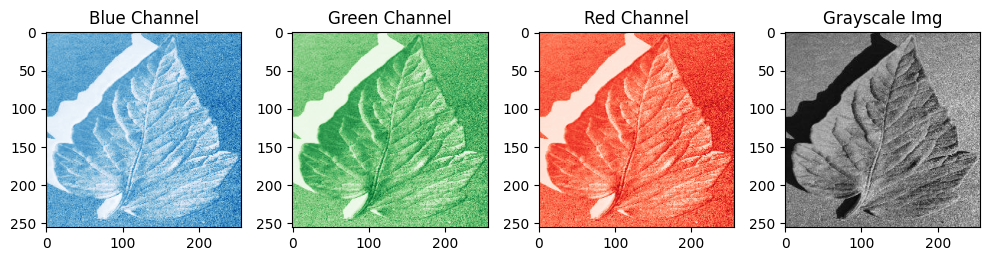

In [9]:
# plotting images
image = train_data[100][0]
blue_channel, green_channel, red_channel = [image[0], image[1], image[2]]

# grayscale image
new_img = np.moveaxis(image, 0, -1)
gray_image = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)


# Plot each channel separately
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
# plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
# plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
# plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Img')
# plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
test_data = create_dataset('val')

In [11]:
save_data(train_data, "train_data")
save_data(test_data, "val_data")